In [3]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Ignore update errors
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
# old
# here we loaded the data (Some we may not use)
# df_2015 = pd.read_csv(data/data_2015.csv)
# df_2016 = pd.read_csv(data/data_2016.csv)
# df_2017 = pd.read_csv(data/data_2017.csv)
# df_2018 = pd.read_csv(data/data_2018.csv)
# df_2019 = pd.read_csv(data/data_2019.csv)

# here we loaded the data (Some we may not use)
df: dict[str: pd.DataFrame] = {}

files = {
    "2015":"data/data_2015.csv",
    "2016":"data/data_2016.csv",
    "2017":"data/data_2017.csv",
    "2018":"data/data_2018.csv",
    "2019":"data/data_2019.csv"
}

for key, file in files.items():
    df[key] = pd.read_csv(file)

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
print("2015:")
display(df["2015"].head())

2015:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
print("2016:")
display(df["2016"].head())

2016:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
print("2017:")
display(df["2017"].head())

2017:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
print("2018:")
display(df["2018"].head())

2018:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


**NOTE:** The score needs Dystopia Residual to calculate which is missing here

In [9]:
print("2019:")
display(df["2019"].head())

2019:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**NOTE:** The score needs Dystopia Residual to calculate which is missing here

## Dataset info
- Six factors of happiness: 
    - economic production 
    - social support
    - life expectancy 
    - freedom 
    - absence of corruption 
    - generosity

- Dystopia: is an imaginary country that has the world’s least-happy people
- Utopia: contrast to Dystopia

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [10]:
df["2015"].info()
print("\nshape:", df["2015"].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
df["2016"].info()
print("\nshape:", df["2015"].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [12]:
df["2017"].info()
print("\nshape:", df["2017"].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [13]:
df["2018"].info()
print("\nshape:", df['2018'].shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB

shape: (156, 9)


**NOTE:**
here we can see that "Perceptions of corruption" have a null value

In [14]:
df["2019"].info()
print("\nshape:", df['2019'].shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB

shape: (156, 9)


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [15]:
'''
Data source:
    - Kaggle
    - Data from the Gallup World Poll

License:
    - CC0: Public Domain
'''

'\nData source:\n    - Kaggle\n    - Data from the Gallup World Poll\n\nLicense:\n    - CC0: Public Domain\n'

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [16]:
# dataset latest update is in 2019 and would be sufficient for our use case

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [17]:
'''
Consistency across datasets:
    - error measurements differ from each dataset (Example: Stander Error, Whiskers, Confidence Intervals) [?]
    - also the scoring needs the Dystopia Residual in 2019 and 2018 [Solved]
    - column names differ if we wanted to merge the dataset we will need to unify them (I dont it is impotent tp unify them since we dont plane to merge them) [Solved]
    - in 2018 dataset the Perceptions of corruption column is missing one value [solved]
'''

'\nConsistency across datasets:\n    - error measurements differ from each dataset (Example: Stander Error, Whiskers, Confidence Intervals) [?]\n    - also the scoring needs the Dystopia Residual in 2019 and 2018 [Solved]\n    - column names differ if we wanted to merge the dataset we will need to unify them (I dont it is impotent tp unify them since we dont plane to merge them) [Solved]\n    - in 2018 dataset the Perceptions of corruption column is missing one value [solved]\n'

##### 3.1 Unify Columns:

Here we will unify columns to facilitate accessing the data across the datasets and in case we merge the datesets later

In [18]:
# here we have general mapping for all different column names, we will use snake_case for the naming snake_cae
column_mapping = {
    'Country': 'country', 
    'Country or region': 'country', # this need to be investigated more
    'Region': 'region', 
    'Happiness Rank': 'happiness_rank', 
    'Overall rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Happiness Score': 'happiness_score', 
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    'Standard Error': 'standard_error',
    'Lower Confidence Interval': 'lower_confidence_interval',
    'Upper Confidence Interval': 'upper_confidence_interval',
    'Whisker.high': 'whisker_high',
    'Whisker.low': 'whisker_low',
    'Economy (GDP per Capita)': 'gdp_per_capita', 
    'GDP per capita': 'gdp_per_capita', 
    'Economy..GDP.per.Capita.': 'gdp_per_capita', 
    'Family': 'social_support',
    'Social support': 'social_support',
    'Health (Life Expectancy)': 'life_expectancy', 
    'Healthy life expectancy': 'life_expectancy', 
    'Health..Life.Expectancy.': 'life_expectancy',
    'Freedom': 'freedom', 
    'Freedom to make life choices': 'freedom',
    'Trust (Government Corruption)': 'government_trust', 
    'Trust..Government.Corruption.': 'government_trust',
    'Perceptions of corruption': 'government_trust',
    'Generosity': 'generosity',
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual'
}

In [19]:
for key in df.keys():
    df[key].rename(mapper=column_mapping,inplace=True, axis=1)
    print(df[key].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            158 non-null    object 
 1   region             158 non-null    object 
 2   happiness_rank     158 non-null    int64  
 3   happiness_score    158 non-null    float64
 4   standard_error     158 non-null    float64
 5   gdp_per_capita     158 non-null    float64
 6   social_support     158 non-null    float64
 7   life_expectancy    158 non-null    float64
 8   freedom            158 non-null    float64
 9   government_trust   158 non-null    float64
 10  generosity         158 non-null    float64
 11  dystopia_residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dt

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [20]:
'''
error measurements differ from each dataset (Example: Stander Error, Whiskers, Confidence Intervals) but we may need the later. 
so, we will keep them for now
'''

'\nerror measurements differ from each dataset (Example: Stander Error, Whiskers, Confidence Intervals) but we may need the later. \nso, we will keep them for now\n'

In [21]:
# we need to add Dystopia Residual to datasets that dont have it

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [22]:
print(f"duplicate (2015): {df['2015'].duplicated().sum()}")
print(f"duplicate (2016): {df['2016'].duplicated().sum()}")
print(f"duplicate (2017): {df['2017'].duplicated().sum()}")
print(f"duplicate (2018): {df['2018'].duplicated().sum()}")
print(f"duplicate (2019): {df['2019'].duplicated().sum()}")

# No duplicate over all datasets
print("No duplicate over all datasets")

duplicate (2015): 0
duplicate (2016): 0
duplicate (2017): 0
duplicate (2018): 0
duplicate (2019): 0
No duplicate over all datasets


In [23]:
# go to delete duplicates columns 
'''
no duplicates
'''

'\nno duplicates\n'

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [24]:
# we are missing Dystopia Residual in datasets 2018 and 2019 before adding them we need to fix the nulls

# Display number missing values per column
print(f"Is null (2015): \n{df['2015'].isna().sum()}\n\n")
print(f"Is null (2016): \n{df['2016'].isna().sum()}\n\n")
print(f"Is null (2017): \n{df['2017'].isna().sum()}\n\n")
# 2018 have null value in government_trust (old: Perceptions of corruption)
print(f"Is null (2018): \n{df['2018'].isna().sum()}\n\n")
print(f"Is null (2019): \n{df['2019'].isna().sum()}\n\n")


Is null (2015): 
country              0
region               0
happiness_rank       0
happiness_score      0
standard_error       0
gdp_per_capita       0
social_support       0
life_expectancy      0
freedom              0
government_trust     0
generosity           0
dystopia_residual    0
dtype: int64


Is null (2016): 
country                      0
region                       0
happiness_rank               0
happiness_score              0
lower_confidence_interval    0
upper_confidence_interval    0
gdp_per_capita               0
social_support               0
life_expectancy              0
freedom                      0
government_trust             0
generosity                   0
dystopia_residual            0
dtype: int64


Is null (2017): 
country              0
happiness_rank       0
happiness_score      0
whisker_high         0
whisker_low          0
gdp_per_capita       0
social_support       0
life_expectancy      0
freedom              0
generosity           0
government

In [25]:
# 2018 have null value in government_trust (old: Perceptions of corruption)
df['2018'][df['2018']['government_trust'].isnull()]
df['2018'].head()

,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


##### 6.1 fix the null in 2018

To fix this issue we will replace the missing data by using the mean from 2017 to 2019 to get a value that is close predict to the actual value. Previously as show in the commented cell below we used the mean for 2 before and after the missing value which is not optimal.

In [26]:
# go to clean them 
# from what we know about our data set we know that we are also missing dystopia_residual (old: Dystopia Residual) in this dataset which is part of the Score calculation
# so we will need to fill this value first then calculate the dystopia_residual

# i will take the mean for neighbor values on Perceptions of corruption
# display(df['2018'][17:22])

# mean_2_before_after = df['2018']["government_trust"].loc[[17,18,20,21]].sum()/4

# df_2018_fixed = df['2018'].copy()

# df_2018_fixed["government_trust"].loc[19] = mean_2_before_after

# # now we implemented our fix
# display(df_2018_fixed[17:22])

In [27]:
# from what we know about our data set we know that we are also missing dystopia_residual (old: Dystopia Residual) in this dataset which is part of the Score calculation
# so we will need to fill this value first then calculate the dystopia_residual

# here we will get United Arab Emirates for 2018
print("2018:")
display( df['2018'][df['2018'].country == 'United Arab Emirates'])
# list to be later used to calculate the mean for government_trust
government_trust = []
government_trust.append(df['2017'][df['2017'].country == 'United Arab Emirates']["government_trust"])
government_trust.append(df['2019'][df['2019'].country == 'United Arab Emirates']["government_trust"])

print(f"Previous values for government_trust: \n{[i.values[0] for i in government_trust]}")

# here we calculate the mean for 2017 and 2019 to get 2018
government_trust = np.mean(government_trust)

print(f"Estimate value: {government_trust}")

2018:


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


Previous values for government_trust: 
[0.324489563703537, 0.182]
Estimate value: 0.25324478185176846


In [28]:
# here we will fix the missing value
df['2018'].loc[df['2018'][df['2018'].country == 'United Arab Emirates'].index, 'government_trust'] = government_trust
print("2018:")
display( df['2018'][df['2018'].country == 'United Arab Emirates'])


2018:


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,0.253245


##### Add the missing column Dystopia Residual

In [29]:
# now we can add dystopia_residual (old: Dystopia Residual) for 2019 and 2018 datasets (both datasets columns have same naming)
# 2018
dystopia_residual = df['2018']["happiness_score"] - df['2018'][["gdp_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "government_trust"]].sum(axis=1)
df['2018']["dystopia_residual"] = dystopia_residual

# 2019
dystopia_residual = df['2019']["happiness_score"] - df['2019'][["gdp_per_capita", "social_support", "life_expectancy", "freedom", "generosity", "government_trust"]].sum(axis=1)
df['2019']["dystopia_residual"] = dystopia_residual

# now the dataset is complete
print("Complete 2018:")
display(df['2018'])
# now the dataset is complete
print("Complete 2019:")
display(df['2019'])

Complete 2018:


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust,dystopia_residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1.106
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,0.628
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1.690
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.488


Complete 2019:


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust,dystopia_residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0.467
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.531
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.792
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.457


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [30]:
# check columns types
for key in df.keys():
    print(f"\n{key}:")
    print(df[key].dtypes)


2015:
country               object
region                object
happiness_rank         int64
happiness_score      float64
standard_error       float64
gdp_per_capita       float64
social_support       float64
life_expectancy      float64
freedom              float64
government_trust     float64
generosity           float64
dystopia_residual    float64
dtype: object

2016:
country                       object
region                        object
happiness_rank                 int64
happiness_score              float64
lower_confidence_interval    float64
upper_confidence_interval    float64
gdp_per_capita               float64
social_support               float64
life_expectancy              float64
freedom                      float64
government_trust             float64
generosity                   float64
dystopia_residual            float64
dtype: object

2017:
country               object
happiness_rank         int64
happiness_score      float64
whisker_high         float64
whiske

In [31]:
# go to clean them
# all looks clean for now (day 2)

2015:


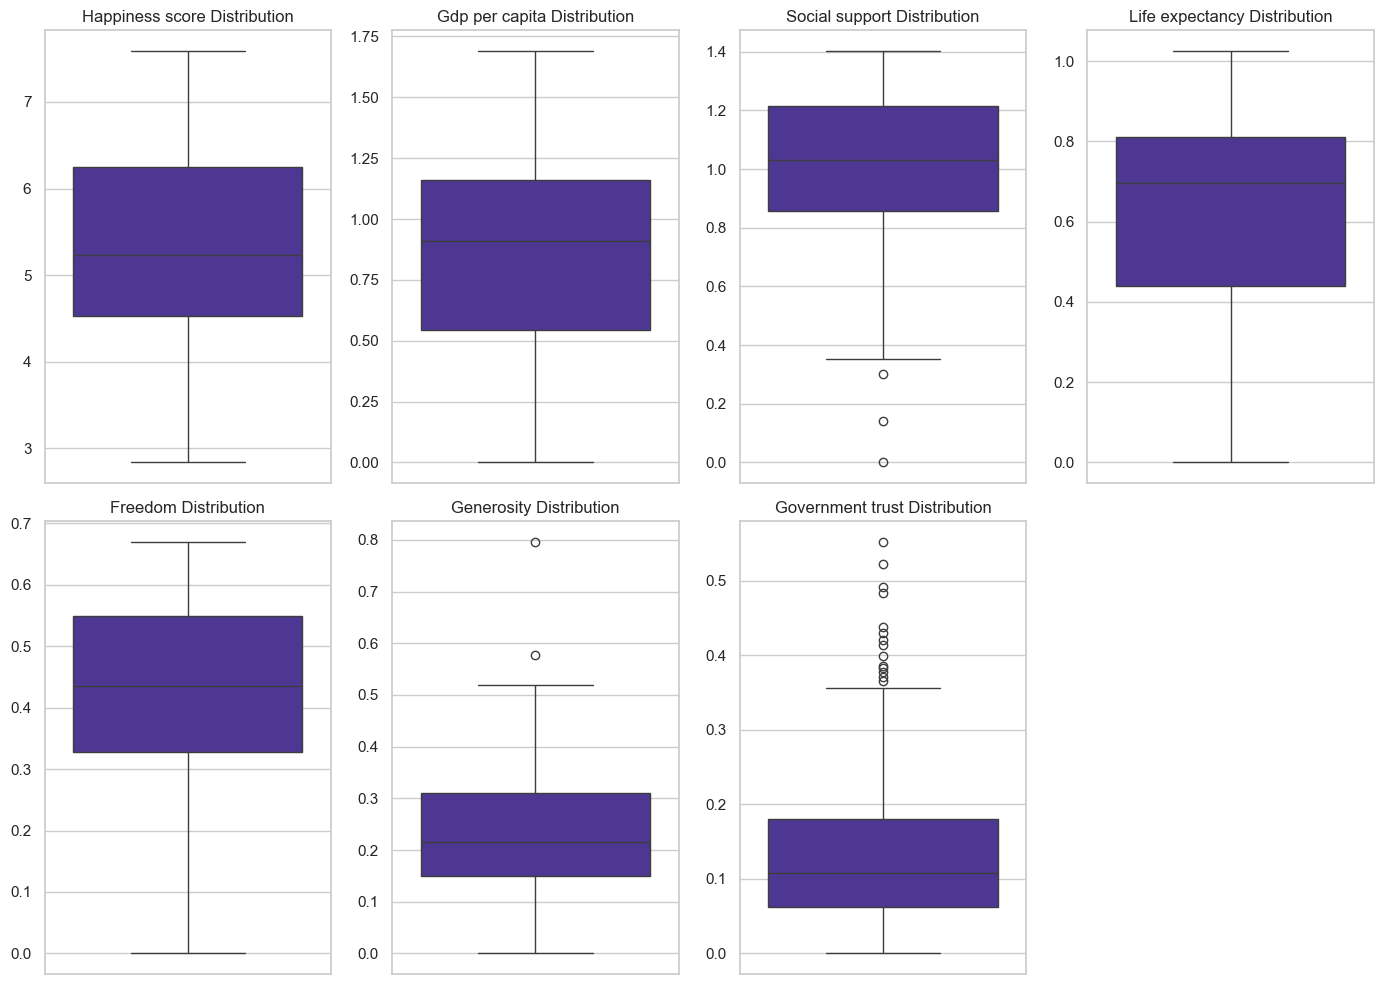





2016:


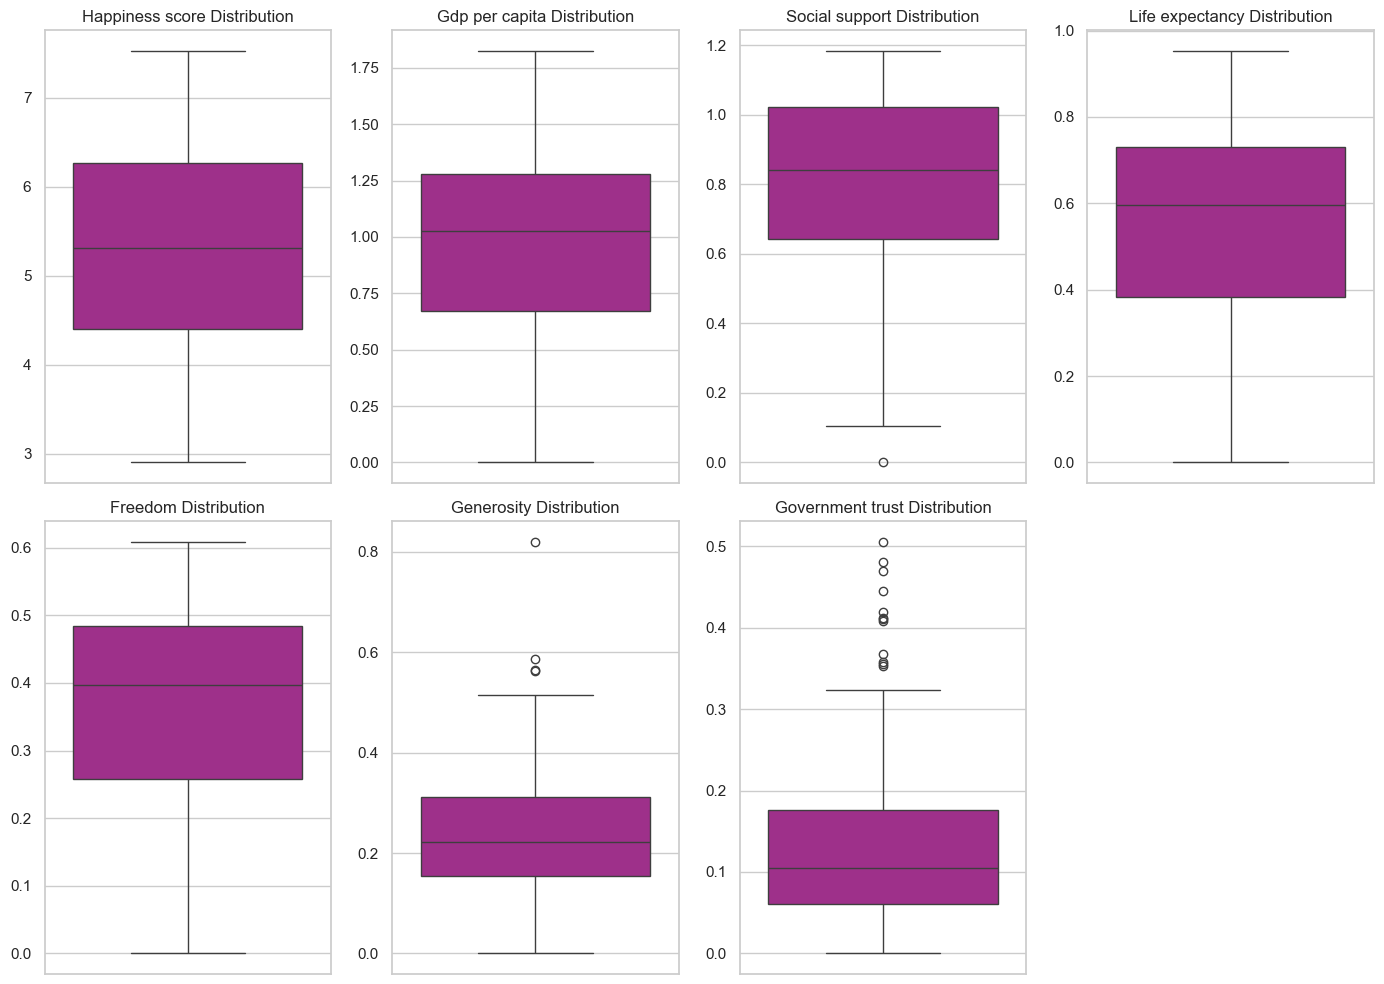





2017:


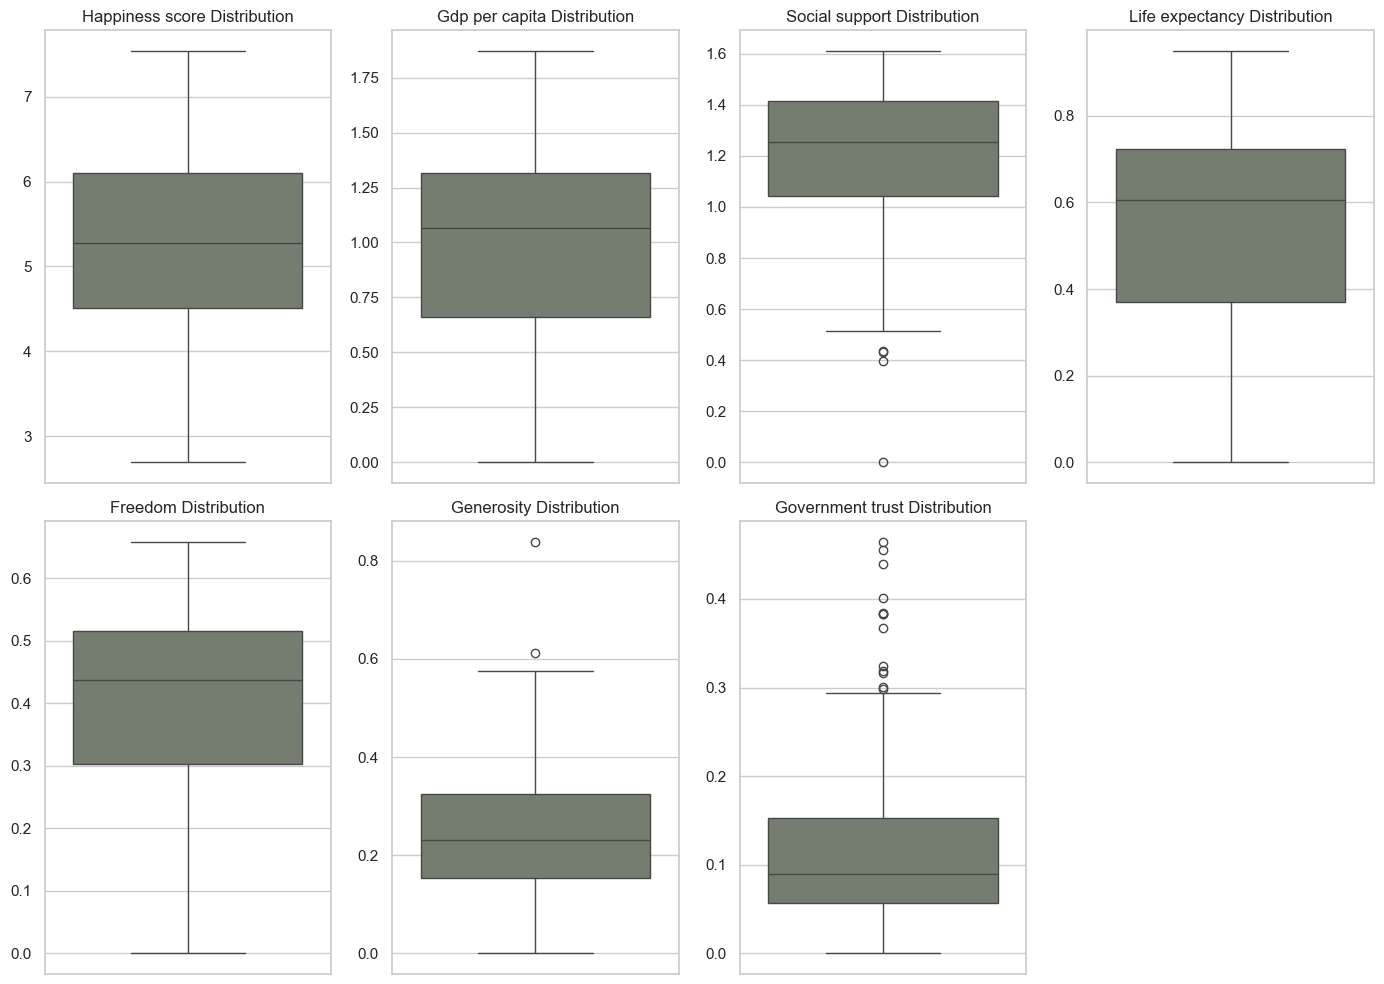





2018:


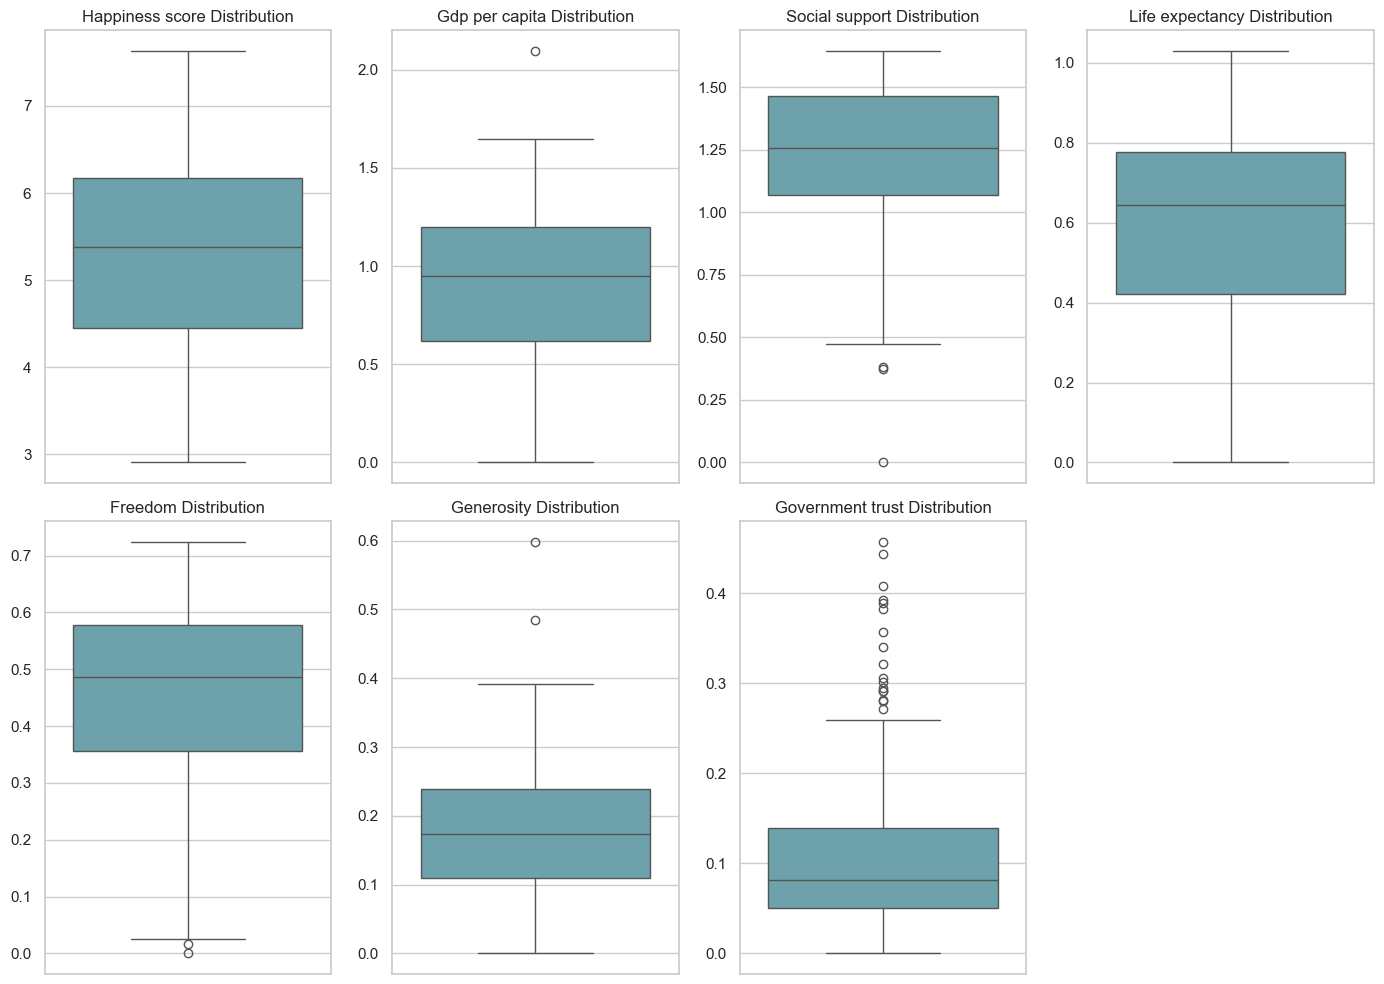





2019:


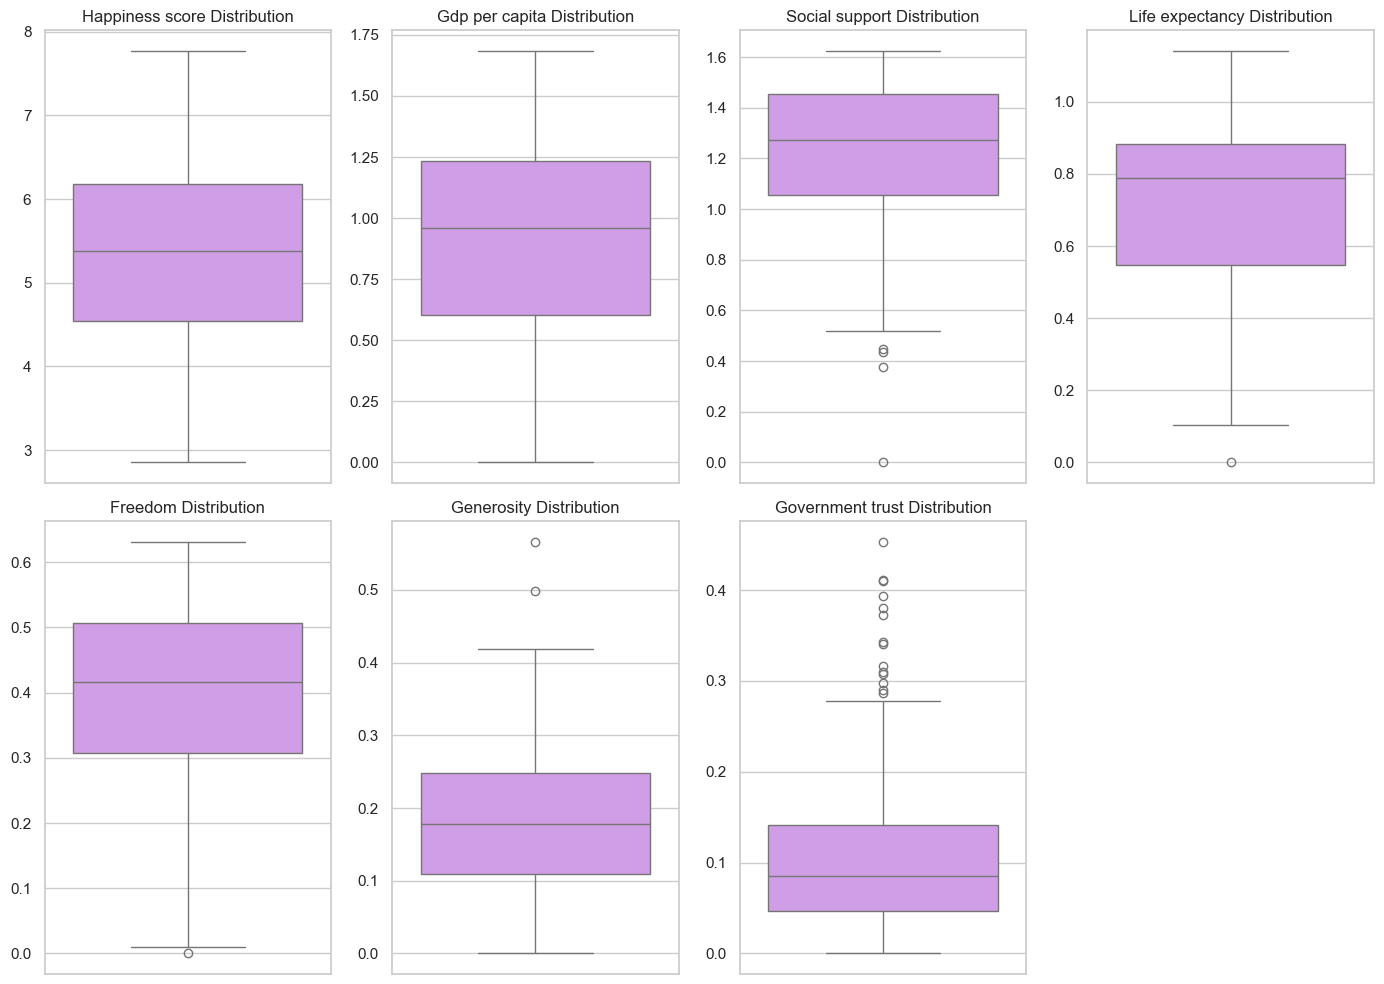

In [32]:
# check outliers
# Set columns we want
column_list = ['happiness_score',
 'gdp_per_capita',
 'social_support',
 'life_expectancy',
 'freedom',
 'generosity',
 'government_trust']


# Set a style
sns.set_theme(style="whitegrid")

for i, key in enumerate(df.keys()):
    print(f"{key}:")
    plt.figure(figsize=(14, 10))  # Adjust figure size as needed
    colors = np.random.rand(len(column_list), 3)  # Generate random colors for each boxplot
    for j, col in enumerate(column_list):
        plt.subplot(2, 4, j + 1)  # Layout to fit all plots nicely
        # Convert underscores to spaces in column names for display
        readable_col_name = col.replace('_', ' ')
        sns.boxplot(y=df[key][col], color=colors[i])
        plt.title(f"{readable_col_name.capitalize()} Distribution")
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.show()
    print("\n\n\n")

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [33]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [34]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [35]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [36]:
# some columns maybe used later (for errors)
for key in df:
    display(df[key].head(2))

,country,region,happiness_rank,happiness_score,standard_error,gdp_per_capita,social_support,life_expectancy,freedom,government_trust,generosity,dystopia_residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,country,region,happiness_rank,happiness_score,lower_confidence_interval,upper_confidence_interval,gdp_per_capita,social_support,life_expectancy,freedom,government_trust,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,country,happiness_rank,happiness_score,whisker_high,whisker_low,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust,dystopia_residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383


,happiness_rank,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,government_trust,dystopia_residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394


In [37]:
# check columns types
for key in df.keys():
    print(f"\n{key}:")
    print(df[key].dtypes)


2015:
country               object
region                object
happiness_rank         int64
happiness_score      float64
standard_error       float64
gdp_per_capita       float64
social_support       float64
life_expectancy      float64
freedom              float64
government_trust     float64
generosity           float64
dystopia_residual    float64
dtype: object

2016:
country                       object
region                        object
happiness_rank                 int64
happiness_score              float64
lower_confidence_interval    float64
upper_confidence_interval    float64
gdp_per_capita               float64
social_support               float64
life_expectancy              float64
freedom                      float64
government_trust             float64
generosity                   float64
dystopia_residual            float64
dtype: object

2017:
country               object
happiness_rank         int64
happiness_score      float64
whisker_high         float64
whiske

In [38]:
# check columns types
for key in df.keys():
    print(f"\n{key}:")
    print(df[key].info())


2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            158 non-null    object 
 1   region             158 non-null    object 
 2   happiness_rank     158 non-null    int64  
 3   happiness_score    158 non-null    float64
 4   standard_error     158 non-null    float64
 5   gdp_per_capita     158 non-null    float64
 6   social_support     158 non-null    float64
 7   life_expectancy    158 non-null    float64
 8   freedom            158 non-null    float64
 9   government_trust   158 non-null    float64
 10  generosity         158 non-null    float64
 11  dystopia_residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None

2016:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                     Non-

In [39]:
# go back to 6th dimention --> Completeness
# For now all columns and data is good

### Correcting errors

-------------------

In [40]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

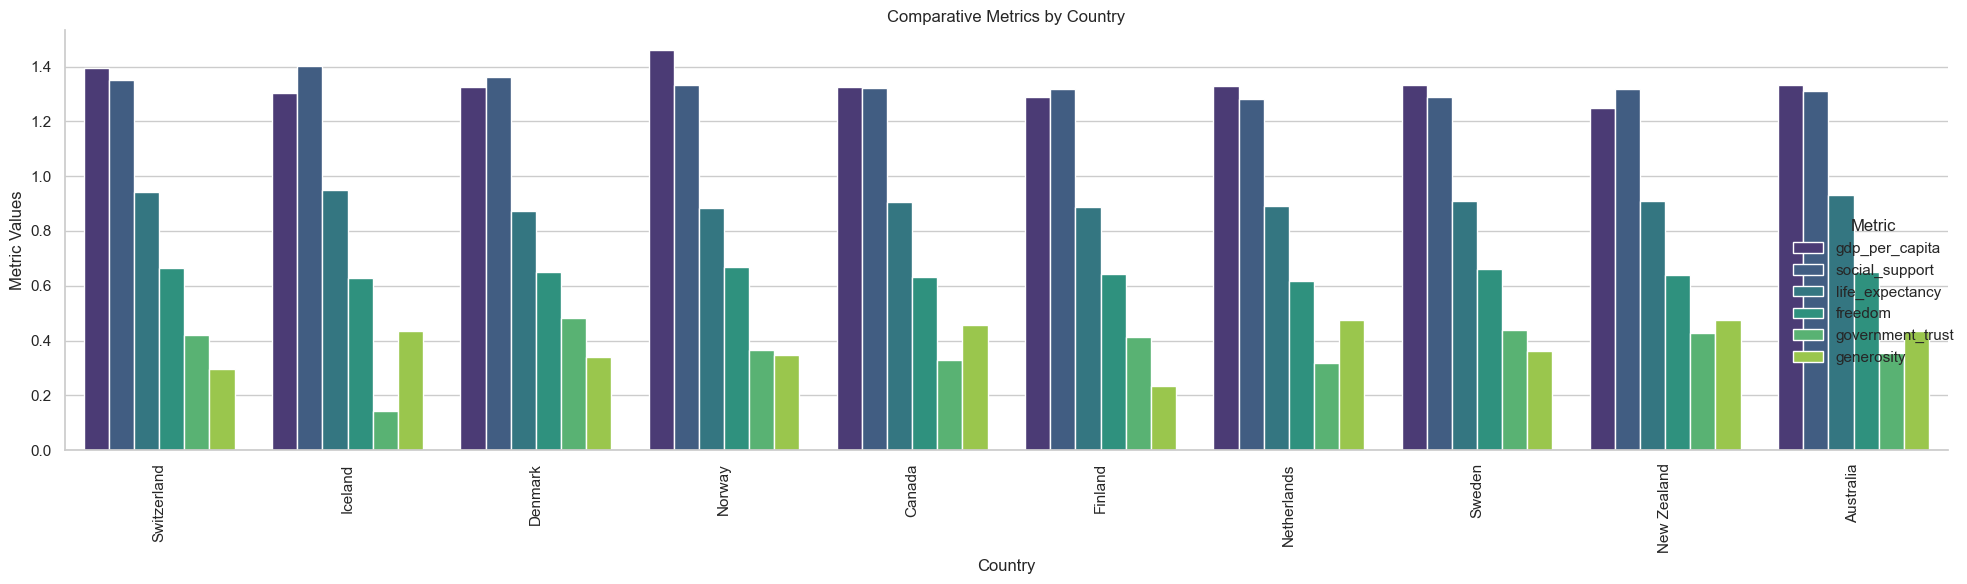

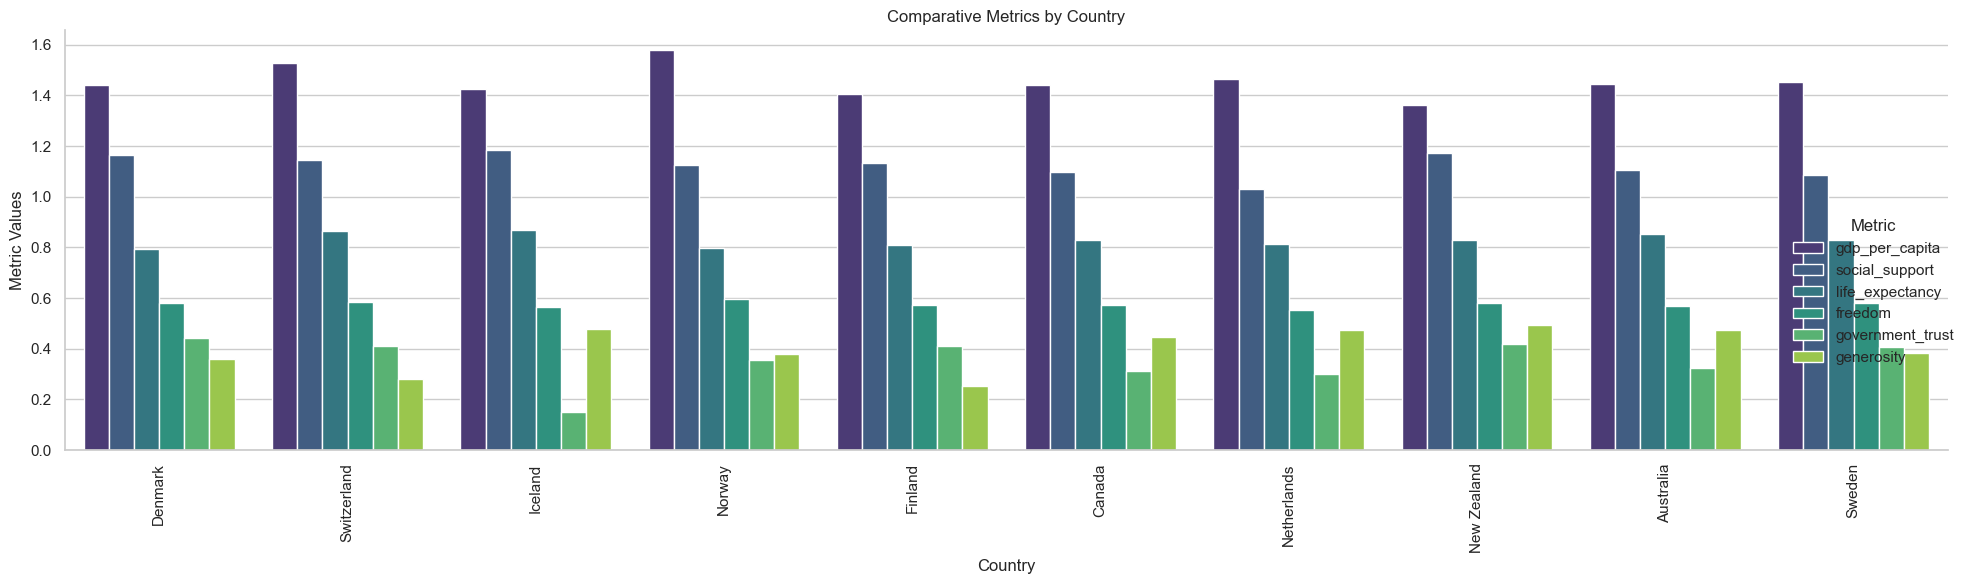

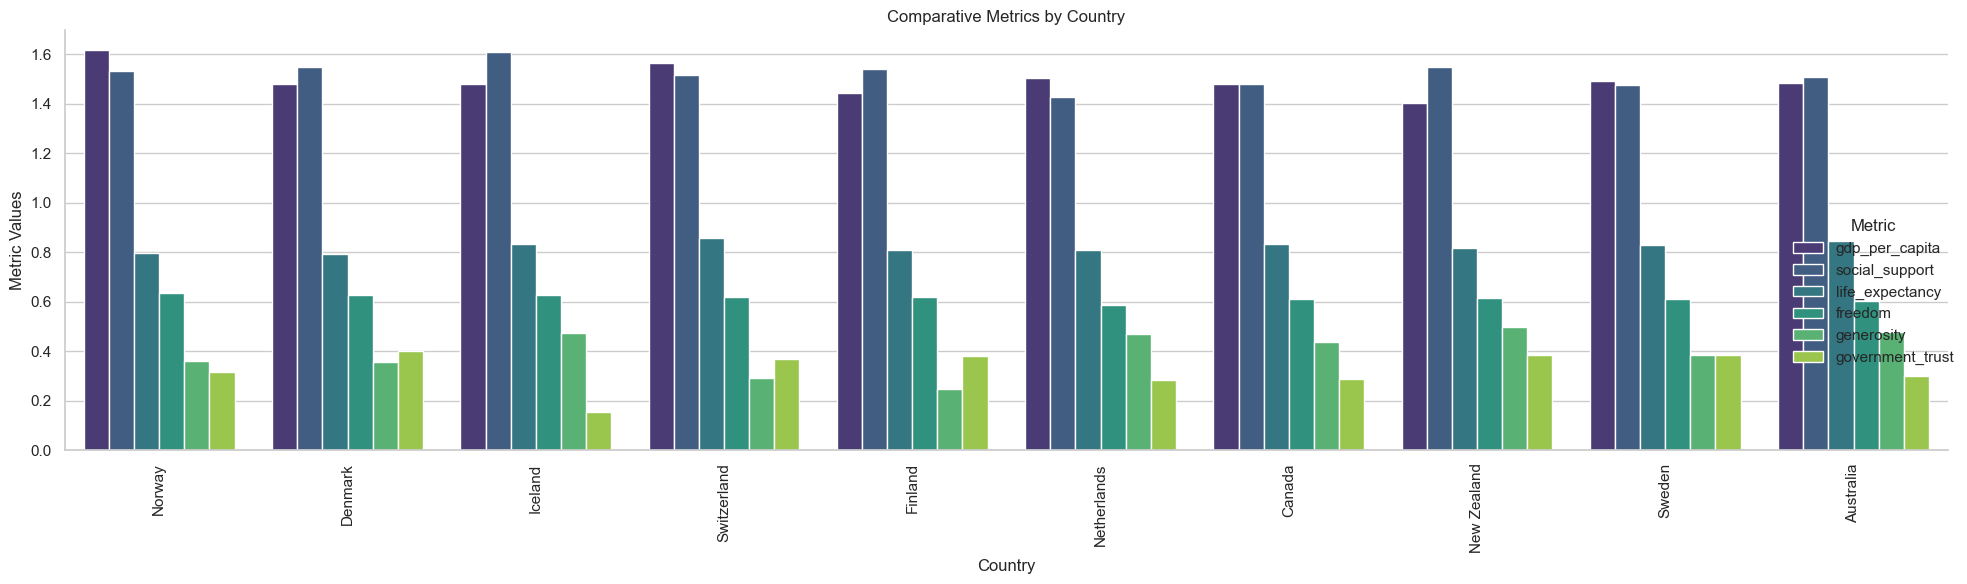

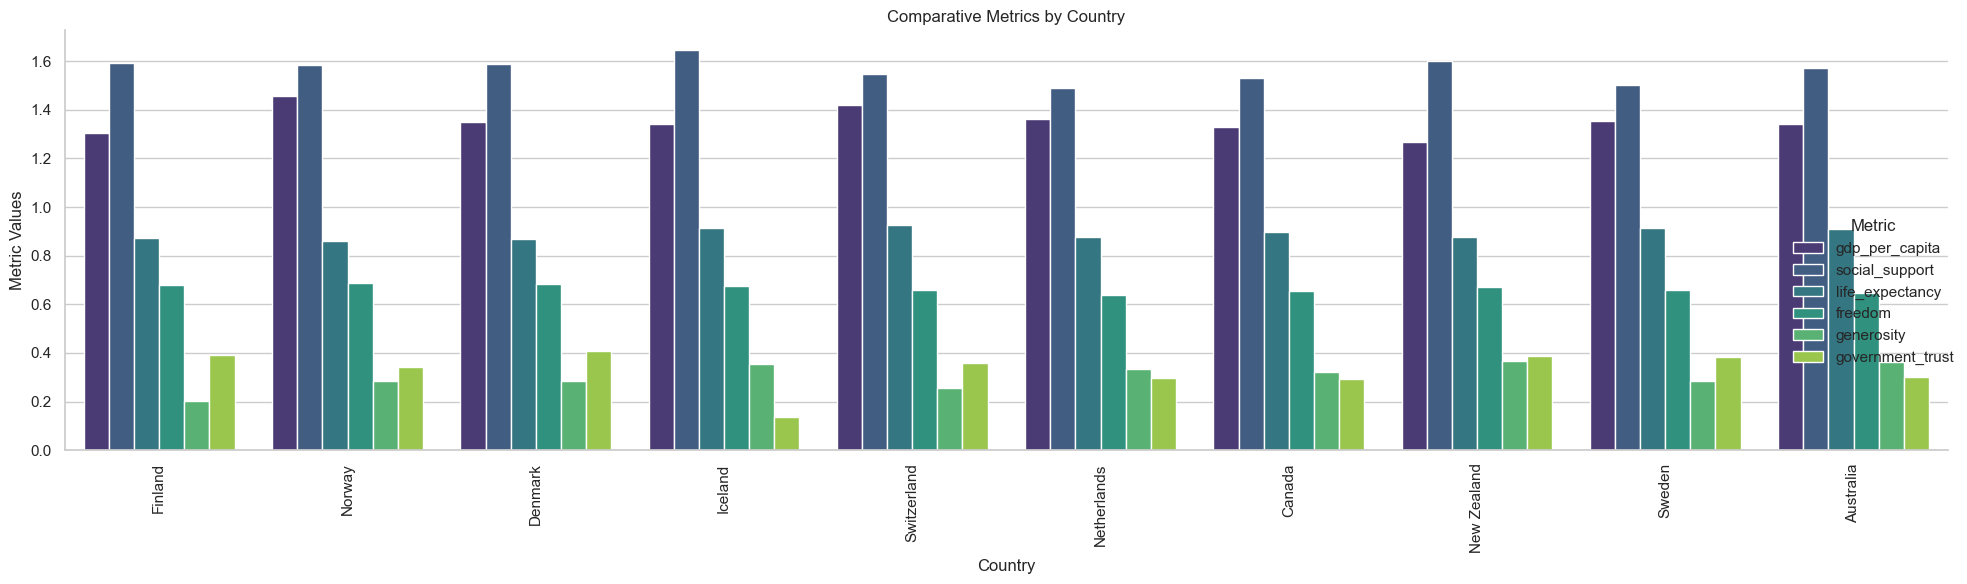

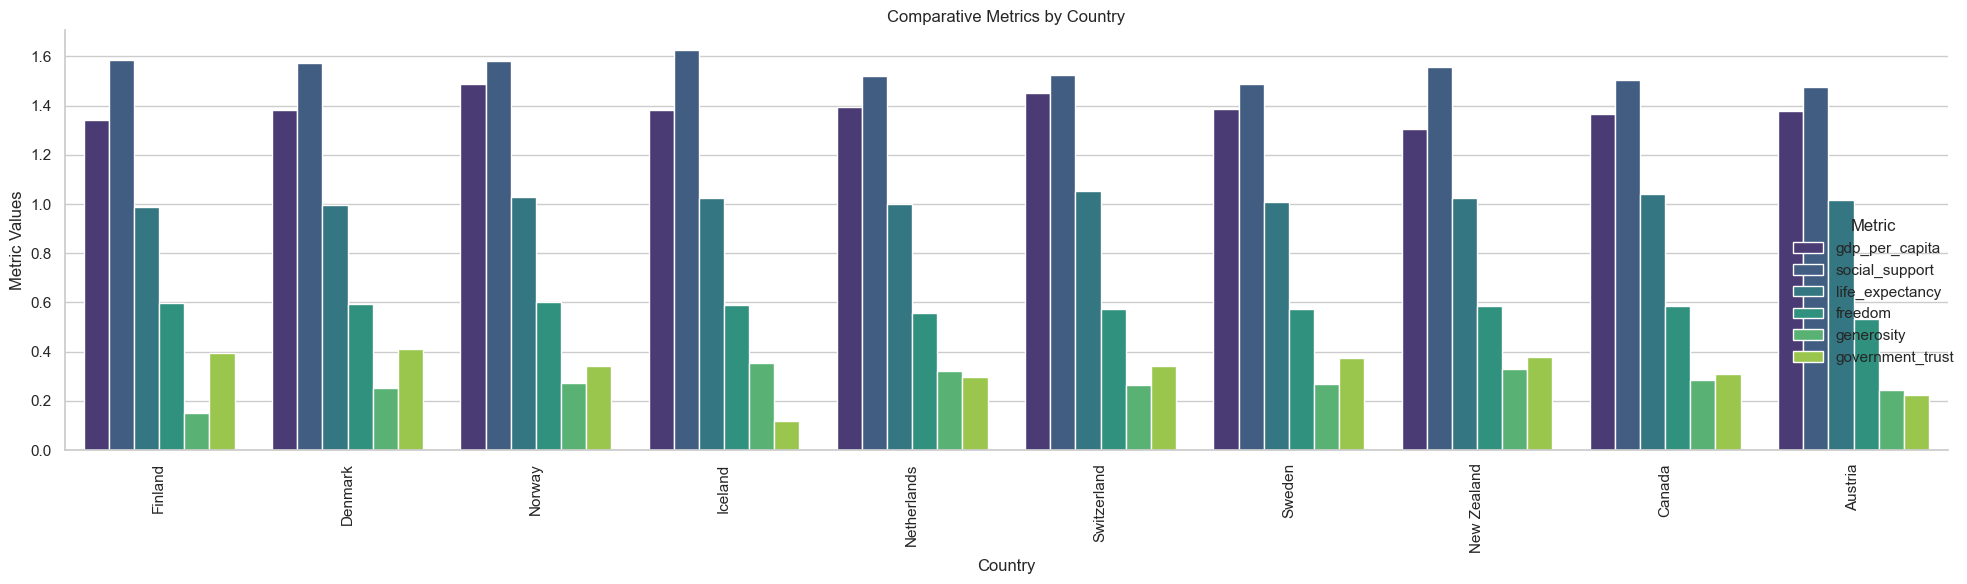

In [60]:
for key in df:
    # Assuming 'df' is your DataFrame with the given data
    # Melting the DataFrame to prepare for grouped bar chart
    df_melted = df[key].head(10).melt(id_vars=['country'], var_name='Metric', value_name='Value')

    # Filtering out 'dystopia_residual' from the plot for clarity, adjust as needed
    df_melted = df_melted[df_melted['Metric'].isin([ 'gdp_per_capita', 'social_support', 
                                                    'life_expectancy', 'freedom', 'generosity', 'government_trust'])]

    # Plotting
    sns.set(style="whitegrid")
    g = sns.catplot(
        data=df_melted, 
        kind='bar',
        x='country',
        y='Value',
        hue='Metric',
        height=6,
        aspect=3,
        palette='viridis'
    )

    plt.title('Comparative Metrics by Country')
    plt.xlabel('Country')
    plt.ylabel('Metric Values')
    plt.xticks(rotation=90)  # Rotating country names for better visibility
    plt.tight_layout()  # Adjust layout to make room for rotated country names

    plt.show()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.